<a href="https://colab.research.google.com/github/kimhwidam/Maching_Learning/blob/main/ML_5%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML 5일차 - Linear Regression

### Basic of Regression

In [2]:
!pip install statsmodels

In [3]:
# 데이터 준비
import pandas as pd

data = {'x': [1, 2, 3, 4, 5],
        'y': [1, 3, 4, 6, 5]}
df = pd.DataFrame(data)
df

,x,y
0,1,1
1,2,3
2,3,4
3,4,6
4,5,5


In [4]:
# 가설 세우기
import statsmodels.formula.api as snf

lr_model = snf.ols(formula='y ~ x', data=df).fit()

In [5]:
lr_model.params

Intercept    0.5
x            1.1
dtype: float64

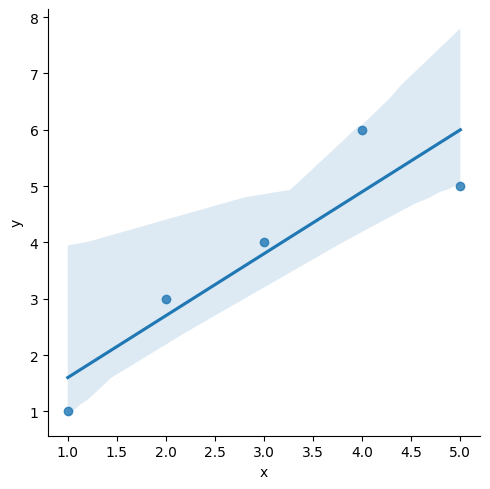

In [6]:
# 그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x='x', y='y', data=df)

In [7]:
# 잔차 확인
resid = lr_model.resid
resid

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
dtype: float64

In [9]:
# 결정계수 구하기
import numpy as np

mu = np.mean(df['y'])
y = df['y']

y_hat = lr_model.predict()
np.sum((y_hat-mu) ** 2) / np.sum((y-mu) ** 2)

0.8175675675675681

In [10]:
# 간단하게 구할 수 있음
lr_model.rsquared

0.8175675675675674

<ipython-input-11-97796afba365>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid, color='black')


<Axes: ylabel='Density'>

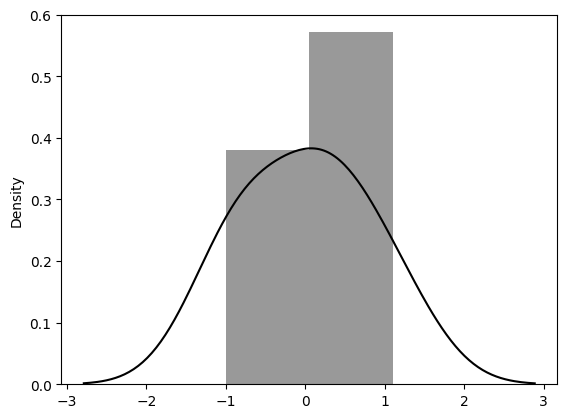

In [11]:
# 잔차 값 시각화
sns.distplot(resid, color='black')

### 통계적 회귀

#### 예제 실습 1 - 이커머스 데이터
데이터 출처 - https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/ecommerce.csv

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 가져오기
data_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/ecommerce.csv'
data = pd.read_csv(data_url)
data.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


* 사용자 세션 길이는 한 번 접속했을 때 평균 어느 정도의 시간을 사용하는지에 대한 데이터
* Time on App: 폰 앱으로 접속했을 때 유지 시간(분)
* Time on Website: 웹사이트로 접속했을 때 유지 시간(분)
* Length of Membership: 회원 자격 유지 기간(연)

In [13]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [14]:
# 필요 없는 컬럼 제거
data.drop(['Email', 'Address', 'Avatar'], axis=1, inplace=True)
data.head(5)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


<Axes: >

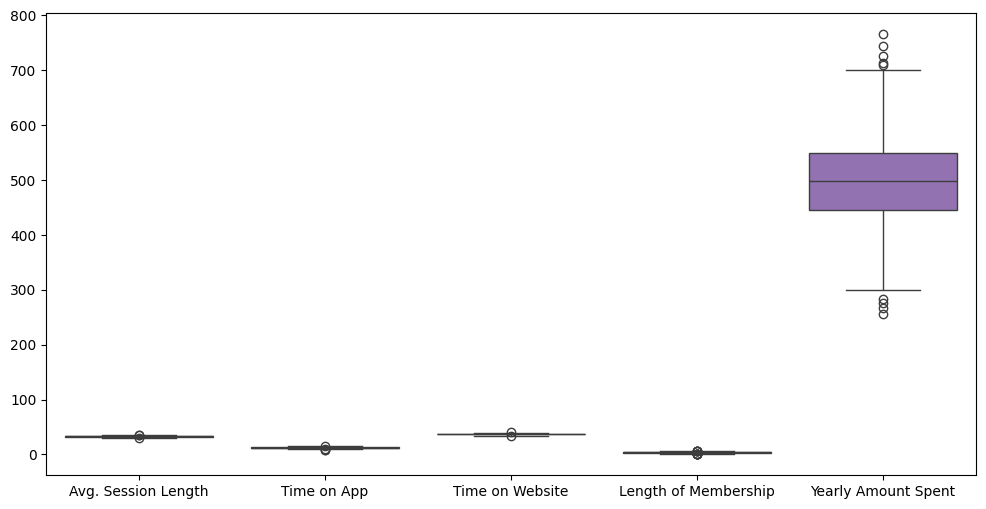

In [16]:
# 컬럼별 boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)

<Axes: >

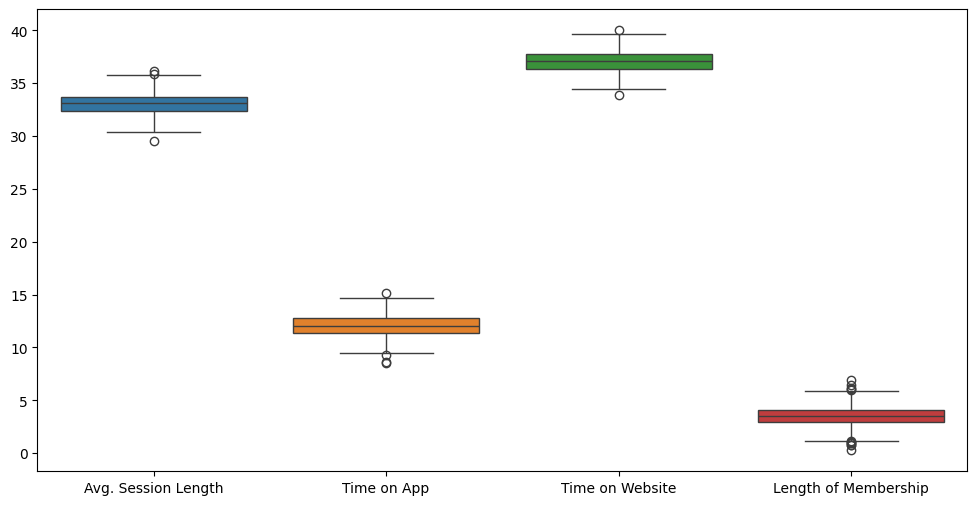

In [17]:
# 특성들만 다시 boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.iloc[:, :-1])

<Axes: ylabel='Yearly Amount Spent'>

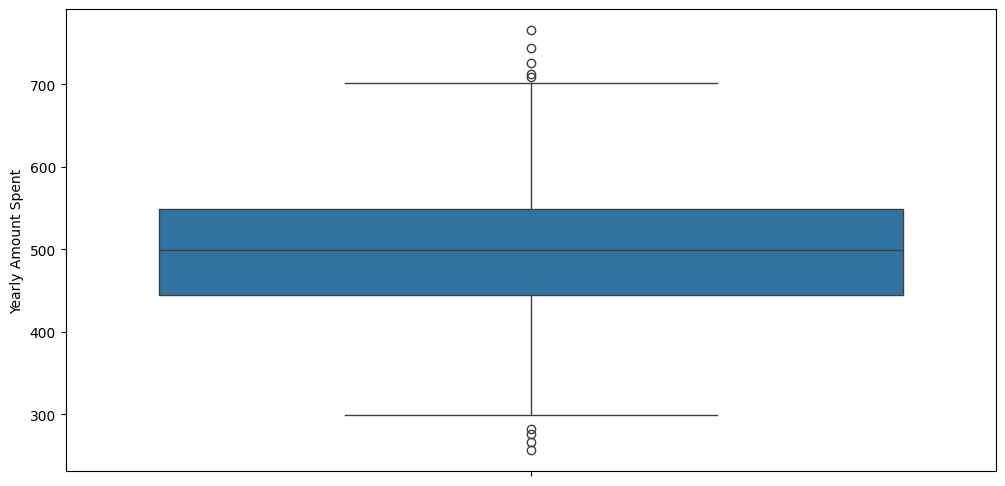

In [18]:
# Label 값에 대한 boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data['Yearly Amount Spent'])

<Figure size 1200x600 with 0 Axes>

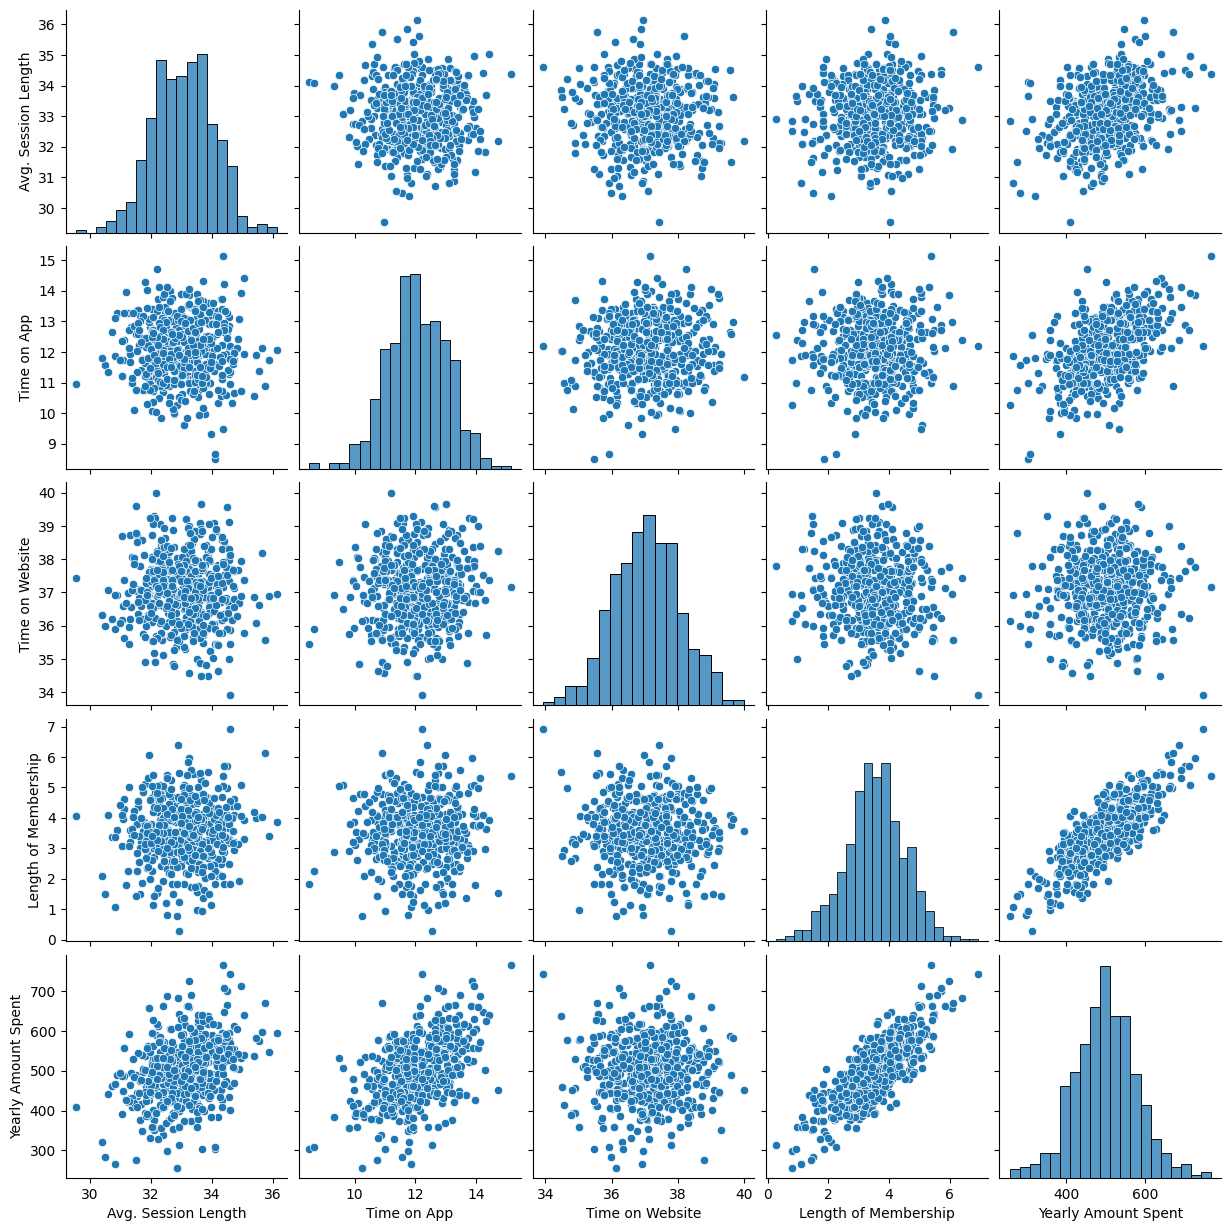

In [19]:
# pairplot으로 경향 확인
plt.figure(figsize=(12, 6))
sns.pairplot(data=data)

큰 상관관계를 보이는 것은 멤버쉽 유지 기간

<Figure size 1200x600 with 0 Axes>

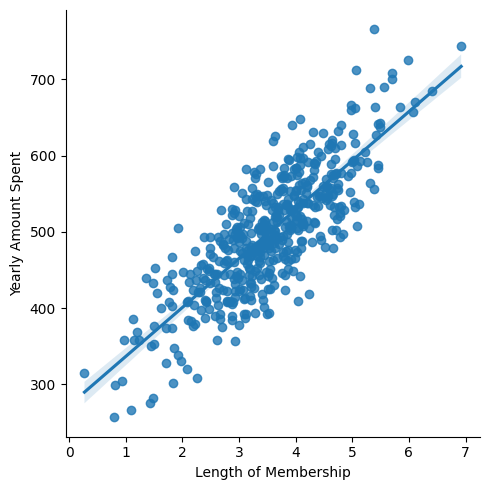

In [20]:
# 그럼 lmplot으로 확인
plt.figure(figsize=(12, 6))
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=data)

In [21]:
# 상관이 높은 멤버쉽 유지기간만 가지고 통계적 회귀
import statsmodels.api as sm

X = data['Length of Membership']
y = data['Yearly Amount Spent']
lr = sm.OLS(y, X).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.970
Model:                             OLS   Adj. R-squared (uncentered):              0.970
Method:                  Least Squares   F-statistic:                          1.617e+04
Date:                 Wed, 24 Apr 2024   Prob (F-statistic):                        0.00
Time:                         09:11:11   Log-Likelihood:                         -2945.2
No. Observations:                  500   AIC:                                      5892.
Df Residuals:                      499   BIC:                                      5897.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Length of Membership   135.6117      1.067    127.145      0.000     133.516     137.707
==============================================================================
Omnibus:                        1.408   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.472
Skew:                           0.125   Prob(JB):                        0.479
Kurtosis:                       2.909   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* R-Squared: 모형 적합도, y의 분산을 각각의 변수들이 약 99.8%로 설명할 수 있음
* Adj. R-suared: 독립변수가 여러 개인 다중회귀분석에서 사용
* Prob. F-Statistic: 회귀모형에 대한 통계적 유의미성 검정 -> 이 값이 0.05 이하라면 모집단에서도 의미가 있다고 볼 수 있음

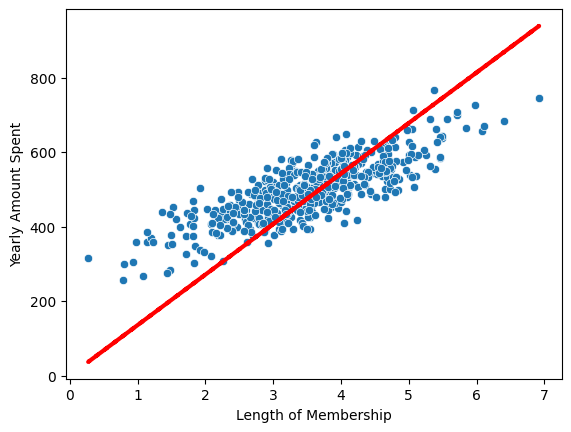

In [22]:
# 회귀 모델 그려보기

pred = lr.predict(X)

sns.scatterplot(x=X, y=y)
plt.plot(X, pred, 'r', ls='dashed', lw=3)

상수항이 없는 것을 확인...

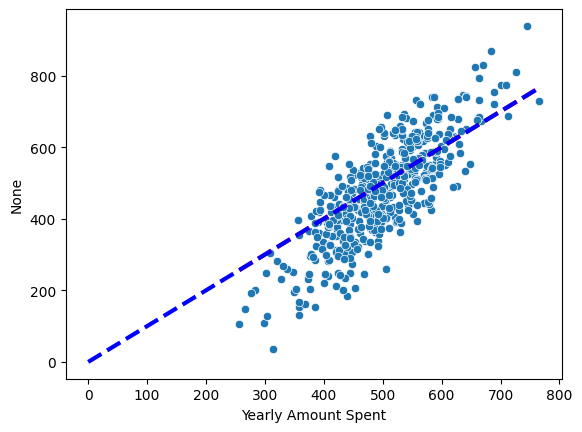

In [24]:
# 상수항 없는 것 확인
sns.scatterplot(x=y, y=pred)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r', ls='dashed', lw=3)
plt.plot([0, max(y)], [0, max(y)], 'b', ls='dashed', lw=3)
# plt.plot(X, pred, 'r', ls='dashed', lw=3)

In [25]:
# 상수항 넣기 -> 열 추가
# c_를 해주면 바로 삽입됨

X = np.c_[X, [1]*len(X)]
X[:5]

array([[4.08262063, 1.        ],
       [2.66403418, 1.        ],
       [4.1045432 , 1.        ],
       [3.12017878, 1.        ],
       [4.44630832, 1.        ]])

In [26]:
lr = sm.OLS(y, X).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.655
Model:                             OLS   Adj. R-squared:                  0.654
Method:                  Least Squares   F-statistic:                     943.9
Date:                 Wed, 24 Apr 2024   Prob (F-statistic):          4.81e-117
Time:                         09:21:20   Log-Likelihood:                -2629.9
No. Observations:                  500   AIC:                             5264.
Df Residuals:                      498   BIC:                             5272.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            64.2187      2.090     30.723      0.000      60.112      68.326
const        272.3998      7.675     35.492      0.000     257.320     287.479
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.122
Skew:                           0.037   Prob(JB):                        0.571
Kurtosis:                       2.780   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* 아까와는 다르게 x1의 밸류와 constant가 잡힘, but R squared가 작아짐...
* R aquared : 평균을 기준으로 데이터의 예측 값과 실체 값 간의 편차
* AIC도 작아짐 -> 낮을 수록 좋음
* AIC : 내가 만들어낸 모델이 나의 데이터를 얼마나 잘 반영하는지 측정하는 도구 = 원래 정보를 얼마나 손실 시키는지의 정도

In [27]:
# 데이터를 7:3으로 분리 후 학습
from sklearn.model_selection import train_test_split

X = data.drop('Yearly Amount Spent', axis=1)
y = data['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=13
)
lr = sm.OLS(y_train, X_train).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.179e+04
Date:                 Wed, 24 Apr 2024   Prob (F-statistic):                        0.00
Time:                         09:26:41   Log-Likelihood:                         -1591.7
No. Observations:                  350   AIC:                                      3191.
Df Residuals:                      346   BIC:                                      3207.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     11.8431      0.906     13.070      0.000      10.061      13.625
Time on App             35.2169      1.212     29.046      0.000      32.832      37.602
Time on Website        -14.2536      0.840    -16.960      0.000     -15.907     -12.601
Length of Membership    60.1702      1.275     47.183      0.000      57.662      62.678
==============================================================================
Omnibus:                        0.648   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.723   Jarque-Bera (JB):                0.755
Skew:                          -0.042   Prob(JB):                        0.686
Kurtosis:                       2.788   Cond. No.                         55.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

AIC 값도 낮아지고, R-squared 값도 높아짐

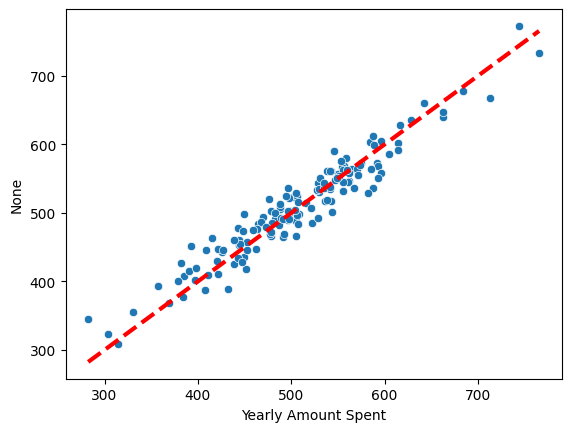

In [28]:
# 테스트 데이터에 대한 참 값 vs 예측 값
pred = lr.predict(X_test)
sns.scatterplot(x=y_test, y=pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', ls='dashed', lw=3)

### Cost Function

In [31]:
import numpy as np

a = np.poly1d([1, 1])
b = np.poly1d([1, -1])

a, b, a+b

(poly1d([1, 1]), poly1d([ 1, -1]), poly1d([2, 0]))

In [32]:
np.poly1d([2, -1])**2 + np.poly1d([3, -5])**2 + np.poly1d([5, -6])**2

poly1d([ 38, -94,  62])

In [34]:
# 최솟값 지점 찾기위해 -> 미분하기(미분해서 0이 되는 지점 찾기, 기울기)
import sympy as sym

# Symbol : 기호로 인식됨
theta = sym.Symbol('th')
# 미분
diff_th = sym.diff(38*theta**2 -94*theta + 62, theta)
diff_th

76*th - 94

### 예제 실습 - Boston 집값 예측

In [36]:
!pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 19.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.2.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [1]:
# 데이터 읽어오기
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [2]:
# 각 특성의 의미
[each for each in boston.feature_names]

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [3]:
# 불러온 데이터를 데이터프레임화
import pandas as pd

boston_pd = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_pd['PRICE'] = boston.target

boston_pd.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# 집값에 대한 히스토그램 시각화
import plotly.express as px

fig = px.histogram(boston_pd, x="PRICE")
fig.show()

<Axes: >

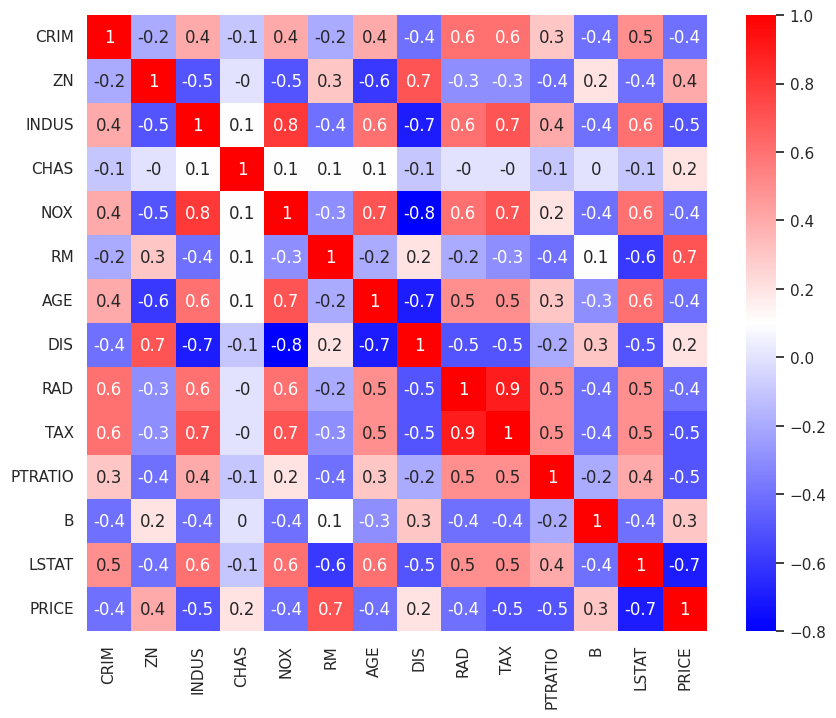

In [8]:
# 상관관계 확인
import matplotlib.pyplot as plt
import seaborn as sns

corr_mat =boston_pd.corr().round(1)
sns.heatmap(data=corr_mat, annot=True, cmap='bwr')

Price와 방의 수(RM), 저소득틍 인구(LSTAT)와 높은 상관관계가 보임

<Axes: xlabel='LSTAT', ylabel='PRICE'>

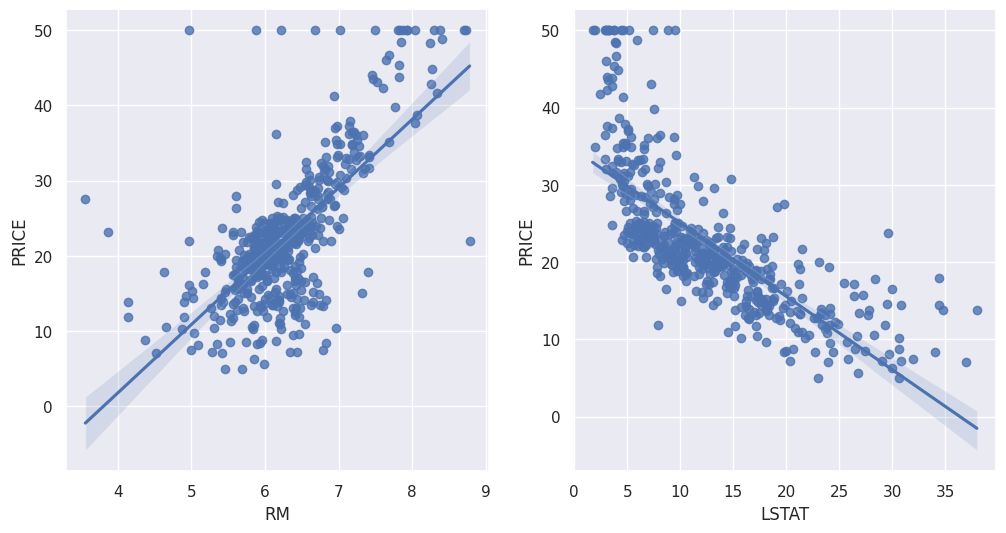

In [9]:
# RM과 LSTAT와 PRICE의 관계를 좀 더 관찰
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (12, 6)})
fig, ax = plt.subplots(ncols=2)
sns.regplot(x='RM', y='PRICE', data=boston_pd, ax=ax[0])
sns.regplot(x='LSTAT', y='PRICE', data=boston_pd, ax=ax[1])

저소득층 인구가 낮을 수록 방의 개수가 많을 수록 집값이 높아진다?

In [11]:
# 데이터를 나누고 학습
# 모델 평가는 RMSE로
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X = boston_pd.drop('PRICE', axis=1)
y = boston_pd['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Test Data: ', rmse_test)

RMSE of Train Data:  4.679350134061538
RMSE of Test Data:  4.8523155400240015


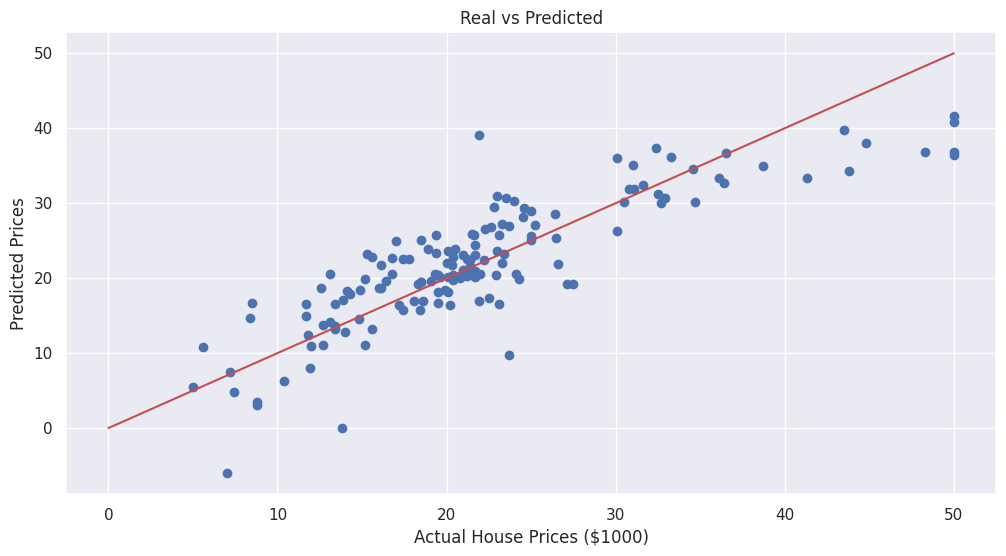

In [13]:
# 성능 확인
plt.scatter(y_test, pred_test)
plt.xlabel('Actual House Prices ($1000)')
plt.ylabel('Predicted Prices')
plt.title('Real vs Predicted')
plt.plot([0,50], [0,50], 'r')
plt.show()

그러면 LSTAT를 사용하는 것이 맞을까?

In [15]:
# 확인
X = boston_pd.drop(['PRICE', 'LSTAT'], axis=1)
y = boston_pd['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Test Data: ', rmse_test)

RMSE of Train Data:  5.271864408436761
RMSE of Test Data:  5.022075568728294


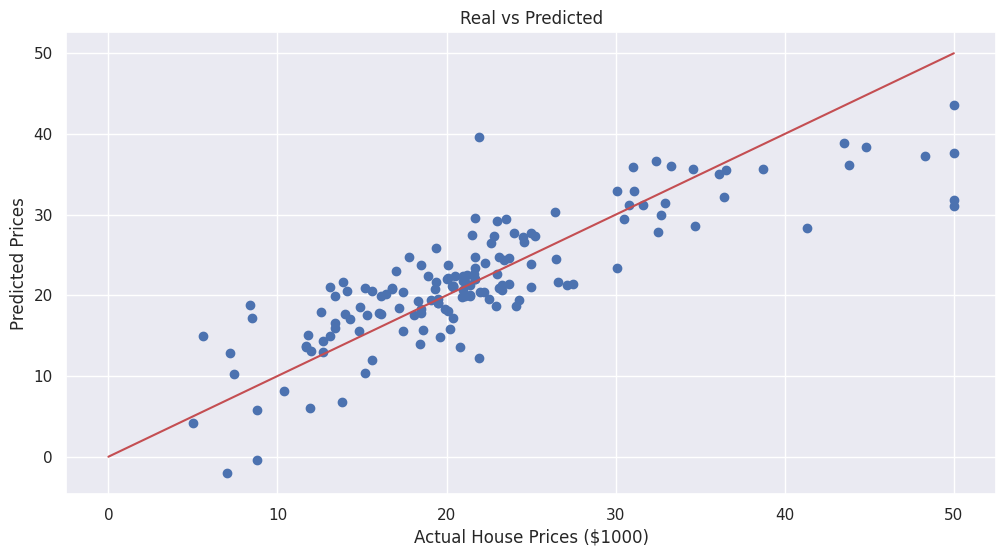

In [16]:
plt.scatter(y_test, pred_test)
plt.xlabel('Actual House Prices ($1000)')
plt.ylabel('Predicted Prices')
plt.title('Real vs Predicted')
plt.plot([0,50], [0,50], 'r')
plt.show()

성능은 나빠짐 -> 아마 이런 류의 고민은 계속되어야 할 것!